In [1]:
import warnings
warnings.filterwarnings('ignore')

import os

import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 100
pd.options.display.max_columns = 20

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score, mean_absolute_error

In [2]:
raw_all = pd.read_csv("bike-sharing-demand/Full.csv")
raw_all

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16
1,2011-01-01 1:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40
2,2011-01-01 2:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32
3,2011-01-01 3:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13
4,2011-01-01 4:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119
17375,2012-12-31 20:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89
17376,2012-12-31 21:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90
17377,2012-12-31 22:00,1,0,1,1,10.66,13.63,56,9.00,13,48,61


In [3]:
if 'datetime' in raw_all.columns:
    raw_all['datetime'] = pd.to_datetime(raw_all['datetime'])
    raw_all['DateTime'] = pd.to_datetime(raw_all['datetime'])

In [4]:
raw_all.index.dtype

dtype('int64')

In [5]:
if raw_all.index.dtype == 'int64':
    raw_all.set_index('datetime', inplace = True)

In [6]:
raw_all

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,DateTime
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,2011-01-01 00:00:00
2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,2011-01-01 01:00:00
2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,2011-01-01 02:00:00
2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,2011-01-01 03:00:00
2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,2011-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119,2012-12-31 19:00:00
2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89,2012-12-31 20:00:00
2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90,2012-12-31 21:00:00


In [7]:
raw_all.asfreq('H').isnull().sum()

season        165
holiday       165
workingday    165
weather       165
temp          165
atemp         165
humidity      165
windspeed     165
casual        165
registered    165
count         165
DateTime      165
dtype: int64

In [8]:
raw_all = raw_all.asfreq('H', method = 'ffill')
raw_all.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=17544, freq='H')

In [9]:
raw_all

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,DateTime
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,2011-01-01 00:00:00
2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,2011-01-01 01:00:00
2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,2011-01-01 02:00:00
2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,2011-01-01 03:00:00
2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,2011-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119,2012-12-31 19:00:00
2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89,2012-12-31 20:00:00
2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90,2012-12-31 21:00:00


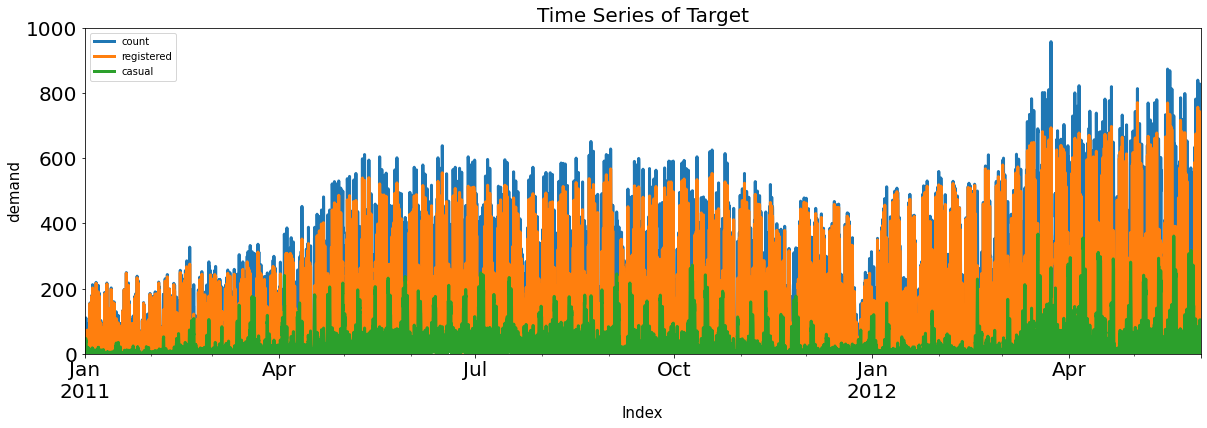

In [10]:
raw_all[['count', 'registered', 'casual']].plot(kind = 'line', figsize = (20, 6), linewidth = 3, fontsize = 20,
                                                xlim = ('2011-01-01', '2012-06-01'), ylim = (0, 1000))
plt.title('Time Series of Target', fontsize = 20)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('demand', fontsize = 15)
plt.show()

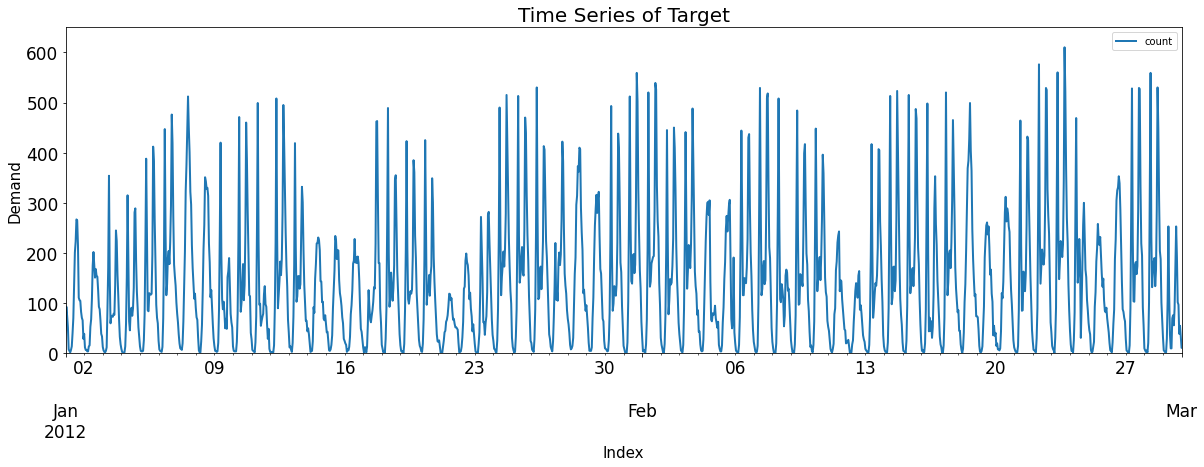

In [11]:
raw_all[['count']].plot(kind = 'line', figsize = (20, 6), linewidth = 2, fontsize = 17,
                        xlim = ('2012-01-01', '2012-03-01'), ylim = (0, 650))
plt.title('Time Series of Target', fontsize = 20)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Demand', fontsize = 15)
plt.show()

In [12]:
result = sm.tsa.seasonal_decompose(raw_all['count'], model = 'additive')

In [13]:
((result.observed - result.trend - result.seasonal) == result.resid).sum()

17520

In [14]:
pd.DataFrame(result.resid).describe()

,resid
count,"17,520.00"
mean,-0.01
std,99.68
min,-377.73
25%,-61.00
50%,-6.01
75%,54.86
max,418.44


In [15]:
result = sm.tsa.seasonal_decompose(raw_all['count'], model = 'additive')
Y_trend = pd.DataFrame(result.trend)
Y_trend.fillna(method = 'ffill', inplace = True)
Y_trend.fillna(method = 'bfill', inplace = True)
Y_trend.columns = ['count_trend']
Y_seasonal = pd.DataFrame(result.seasonal)
Y_seasonal.fillna(method = 'ffill', inplace = True)
Y_seasonal.fillna(method = 'bfill', inplace = True)
Y_seasonal.columns = ['count_seasonal']

In [16]:
if 'count_trend' not in raw_all.columns:
    if 'count_seasonal' not in raw_all.columns:
        raw_all = pd.concat([raw_all, Y_trend, Y_seasonal], axis = 1)
raw_all

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,DateTime,count_trend,count_seasonal
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,2011-01-01 00:00:00,41.06,-134.25
2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,2011-01-01 01:00:00,41.06,-154.75
2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,2011-01-01 02:00:00,41.06,-165.27
2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,2011-01-01 03:00:00,41.06,-176.48
2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,2011-01-01 04:00:00,41.06,-181.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119,2012-12-31 19:00:00,113.71,122.70
2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89,2012-12-31 20:00:00,113.71,37.48
2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90,2012-12-31 21:00:00,113.71,-16.10


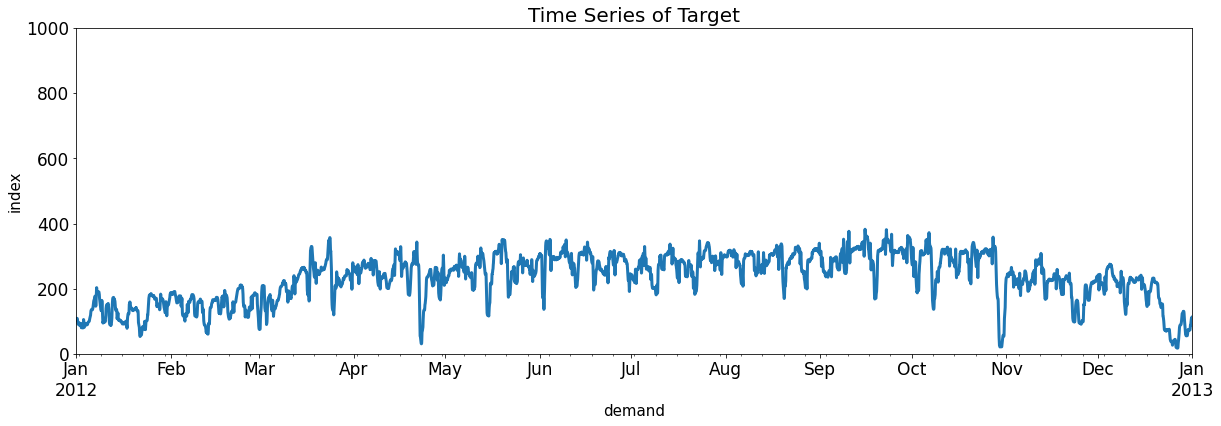

In [17]:
raw_all['count'].rolling(24).mean().plot(kind = 'line', figsize = (20, 6), linewidth = 3, fontsize = 17,
                                         xlim = ('2012-01-01', '2013-01-01'), ylim = (0, 1000))
plt.title('Time Series of Target', fontsize = 20)
plt.xlabel('demand', fontsize = 15)
plt.ylabel('index', fontsize = 15)
plt.show()

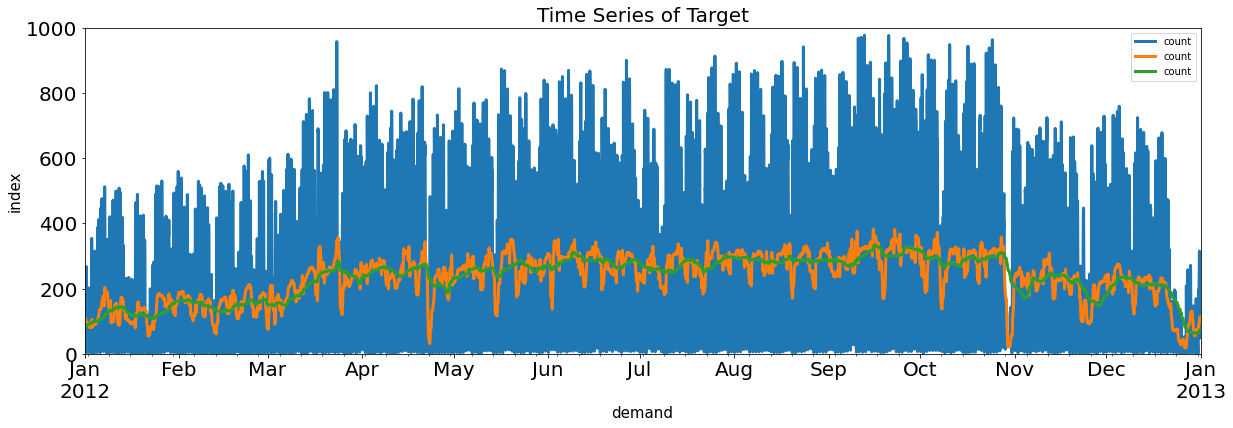

In [18]:
pd.concat([raw_all['count'],
           raw_all['count'].rolling(24).mean(),
           raw_all['count'].rolling(24*7).mean()], axis = 1).plot(kind = 'line', figsize = (20,6), fontsize = 20, linewidth = 3,
                                                                xlim = ('2012-01-01', '2013-01-01'), ylim = (0, 1000))
plt.title('Time Series of Target', fontsize = 20)
plt.xlabel('demand', fontsize = 15)
plt.ylabel('index', fontsize = 15)
plt.show()

In [19]:
Y_count_Day = raw_all[['count']].rolling(24).mean()
Y_count_Day.fillna(method = 'ffill', inplace = True)
Y_count_Day.fillna(method = 'bfill', inplace = True)
Y_count_Day.columns = ['count_Day']

Y_count_Week = raw_all[['count']].rolling(24).mean()
Y_count_Week.fillna(method = 'ffill', inplace = True)
Y_count_Week.fillna(method = 'bfill', inplace = True)
Y_count_Week.columns = ['count_Week']

if 'count_Day' not in raw_all.columns:
    if 'count_Week' not in raw_all.columns:
        raw_all = pd.concat([raw_all, Y_count_Day, Y_count_Week], axis = 1)

raw_all

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,DateTime,count_trend,count_seasonal,count_Day,count_Week
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,2011-01-01 00:00:00,41.06,-134.25,41.04,41.04
2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,2011-01-01 01:00:00,41.06,-154.75,41.04,41.04
2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,2011-01-01 02:00:00,41.06,-165.27,41.04,41.04
2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,2011-01-01 03:00:00,41.06,-176.48,41.04,41.04
2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,2011-01-01 04:00:00,41.06,-181.67,41.04,41.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119,2012-12-31 19:00:00,113.71,122.70,110.17,110.17
2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89,2012-12-31 20:00:00,113.71,37.48,110.88,110.88
2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90,2012-12-31 21:00:00,113.71,-16.10,112.67,112.67


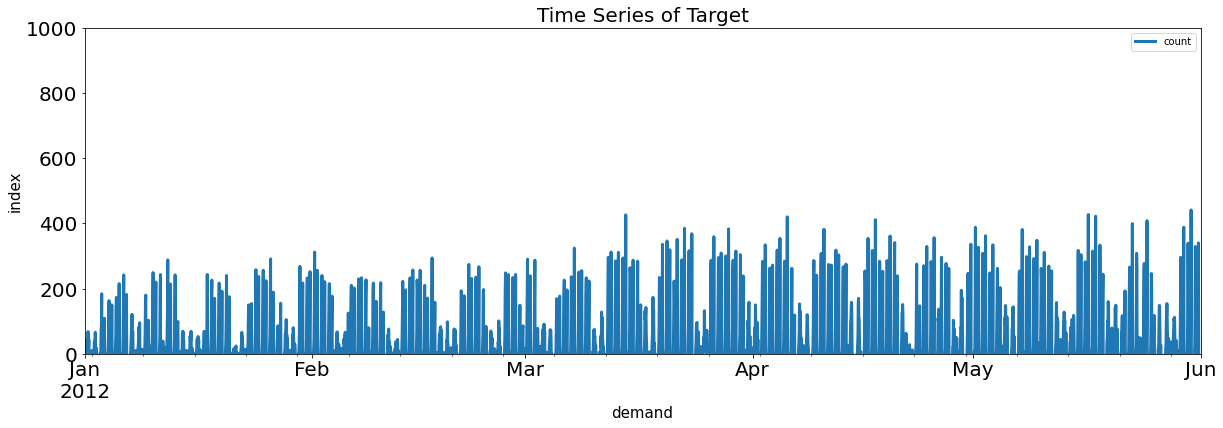

In [20]:
raw_all[['count']].diff().plot(kind = 'line', figsize = (20, 6), linewidth = 3, fontsize = 20,
                               xlim = ('2012-01-01', '2012-06-01'), ylim = (0, 1000))
plt.title('Time Series of Target', fontsize = 20)
plt.xlabel('demand', fontsize = 15)
plt.ylabel('index', fontsize = 15)
plt.show()

In [21]:
Y_diff = raw_all[['count']].diff()
Y_diff.fillna(method = 'ffill', inplace = True)
Y_diff.fillna(method = 'bfill', inplace = True)
Y_diff.columns = ['count_diff']

if 'count_diff' not in raw_all.columns:
    raw_all = pd.concat([raw_all, Y_diff], axis = 1)

raw_all

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,DateTime,count_trend,count_seasonal,count_Day,count_Week,count_diff
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,2011-01-01 00:00:00,41.06,-134.25,41.04,41.04,24.00
2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,2011-01-01 01:00:00,41.06,-154.75,41.04,41.04,24.00
2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,2011-01-01 02:00:00,41.06,-165.27,41.04,41.04,-8.00
2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,2011-01-01 03:00:00,41.06,-176.48,41.04,41.04,-19.00
2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,2011-01-01 04:00:00,41.06,-181.67,41.04,41.04,-12.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119,2012-12-31 19:00:00,113.71,122.70,110.17,110.17,-3.00
2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89,2012-12-31 20:00:00,113.71,37.48,110.88,110.88,-30.00
2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90,2012-12-31 21:00:00,113.71,-16.10,112.67,112.67,1.00


In [22]:
raw_all[['temp']].ndim

2

In [23]:
raw_all['temp_group'] = pd.cut(raw_all['temp'], 10)
raw_all

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,DateTime,count_trend,count_seasonal,count_Day,count_Week,count_diff,temp_group
datetime,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,2011-01-01 00:00:00,41.06,-134.25,41.04,41.04,24.00,"(8.856, 12.874]"
2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,2011-01-01 01:00:00,41.06,-154.75,41.04,41.04,24.00,"(8.856, 12.874]"
2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,2011-01-01 02:00:00,41.06,-165.27,41.04,41.04,-8.00,"(8.856, 12.874]"
2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,2011-01-01 03:00:00,41.06,-176.48,41.04,41.04,-19.00,"(8.856, 12.874]"
2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,2011-01-01 04:00:00,41.06,-181.67,41.04,41.04,-12.00,"(8.856, 12.874]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119,2012-12-31 19:00:00,113.71,122.70,110.17,110.17,-3.00,"(8.856, 12.874]"
2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89,2012-12-31 20:00:00,113.71,37.48,110.88,110.88,-30.00,"(8.856, 12.874]"
2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90,2012-12-31 21:00:00,113.71,-16.10,112.67,112.67,1.00,"(8.856, 12.874]"


In [24]:
raw_all.isnull().sum()

season            0
holiday           0
workingday        0
weather           0
temp              0
atemp             0
humidity          0
windspeed         0
casual            0
registered        0
count             0
DateTime          0
count_trend       0
count_seasonal    0
count_Day         0
count_Week        0
count_diff        0
temp_group        0
dtype: int64

In [25]:
raw_all.DateTime.dt.year

datetime
2011-01-01 00:00:00    2011
2011-01-01 01:00:00    2011
2011-01-01 02:00:00    2011
2011-01-01 03:00:00    2011
2011-01-01 04:00:00    2011
                       ... 
2012-12-31 19:00:00    2012
2012-12-31 20:00:00    2012
2012-12-31 21:00:00    2012
2012-12-31 22:00:00    2012
2012-12-31 23:00:00    2012
Freq: H, Name: DateTime, Length: 17544, dtype: int64

In [26]:
raw_all['Year'] = raw_all.DateTime.dt.year
raw_all['Quarter'] = raw_all.DateTime.dt.quarter

In [27]:
raw_all['Quarter_ver2'] = raw_all['Quarter'] + (raw_all.Year - raw_all.Year.min()) * 4
raw_all

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,DateTime,count_trend,count_seasonal,count_Day,count_Week,count_diff,temp_group,Year,Quarter,Quarter_ver2
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,...,2011-01-01 00:00:00,41.06,-134.25,41.04,41.04,24.00,"(8.856, 12.874]",2011,1,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,...,2011-01-01 01:00:00,41.06,-154.75,41.04,41.04,24.00,"(8.856, 12.874]",2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,...,2011-01-01 02:00:00,41.06,-165.27,41.04,41.04,-8.00,"(8.856, 12.874]",2011,1,1
2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,...,2011-01-01 03:00:00,41.06,-176.48,41.04,41.04,-19.00,"(8.856, 12.874]",2011,1,1
2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,...,2011-01-01 04:00:00,41.06,-181.67,41.04,41.04,-12.00,"(8.856, 12.874]",2011,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,...,2012-12-31 19:00:00,113.71,122.70,110.17,110.17,-3.00,"(8.856, 12.874]",2012,4,8
2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,...,2012-12-31 20:00:00,113.71,37.48,110.88,110.88,-30.00,"(8.856, 12.874]",2012,4,8
2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,...,2012-12-31 21:00:00,113.71,-16.10,112.67,112.67,1.00,"(8.856, 12.874]",2012,4,8


In [28]:
raw_all['Month'] = raw_all.DateTime.dt.month
raw_all['Day'] = raw_all.DateTime.dt.day
raw_all['Hour'] = raw_all.DateTime.dt.hour
raw_all['DayofWeek'] = raw_all.DateTime.dt.dayofweek

raw_all

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,count_Week,count_diff,temp_group,Year,Quarter,Quarter_ver2,Month,Day,Hour,DayofWeek
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,...,41.04,24.00,"(8.856, 12.874]",2011,1,1,1,1,0,5
2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,...,41.04,24.00,"(8.856, 12.874]",2011,1,1,1,1,1,5
2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,...,41.04,-8.00,"(8.856, 12.874]",2011,1,1,1,1,2,5
2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,...,41.04,-19.00,"(8.856, 12.874]",2011,1,1,1,1,3,5
2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,...,41.04,-12.00,"(8.856, 12.874]",2011,1,1,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,...,110.17,-3.00,"(8.856, 12.874]",2012,4,8,12,31,19,0
2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,...,110.88,-30.00,"(8.856, 12.874]",2012,4,8,12,31,20,0
2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,...,112.67,1.00,"(8.856, 12.874]",2012,4,8,12,31,21,0


In [29]:
raw_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17544 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Freq: H
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   season          17544 non-null  int64         
 1   holiday         17544 non-null  int64         
 2   workingday      17544 non-null  int64         
 3   weather         17544 non-null  int64         
 4   temp            17544 non-null  float64       
 5   atemp           17544 non-null  float64       
 6   humidity        17544 non-null  int64         
 7   windspeed       17544 non-null  float64       
 8   casual          17544 non-null  int64         
 9   registered      17544 non-null  int64         
 10  count           17544 non-null  int64         
 11  DateTime        17544 non-null  datetime64[ns]
 12  count_trend     17544 non-null  float64       
 13  count_seasonal  17544 non-null  float64       
 14  count_Day  

In [32]:
raw_all = pd.concat([raw_all, pd.get_dummies(raw_all['Quarter'], prefix = 'Quarter_Dummy', drop_first = True)])
raw_all

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,Year,Quarter,Quarter_ver2,Month,Day,Hour,DayofWeek,Quarter_Dummy_2,Quarter_Dummy_3,Quarter_Dummy_4
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1.00,0.00,0.00,1.00,9.84,14.39,81.00,0.00,3.00,13.00,...,"2,011.00",1.00,1.00,1.00,1.00,0.00,5.00,NaN,NaN,NaN
2011-01-01 01:00:00,1.00,0.00,0.00,1.00,9.02,13.63,80.00,0.00,8.00,32.00,...,"2,011.00",1.00,1.00,1.00,1.00,1.00,5.00,NaN,NaN,NaN
2011-01-01 02:00:00,1.00,0.00,0.00,1.00,9.02,13.63,80.00,0.00,5.00,27.00,...,"2,011.00",1.00,1.00,1.00,1.00,2.00,5.00,NaN,NaN,NaN
2011-01-01 03:00:00,1.00,0.00,0.00,1.00,9.84,14.39,75.00,0.00,3.00,10.00,...,"2,011.00",1.00,1.00,1.00,1.00,3.00,5.00,NaN,NaN,NaN
2011-01-01 04:00:00,1.00,0.00,0.00,1.00,9.84,14.39,75.00,0.00,0.00,1.00,...,"2,011.00",1.00,1.00,1.00,1.00,4.00,5.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,1.00
2012-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,1.00
2012-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,1.00


In [ ]:
123